#### Synthetic Data Cleaning

**Name:** Manuel Ibañez Salazar



#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Read Dataset

In [11]:
df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


#### Exploratory Data Analysis

In [12]:
df.isnull().sum()

Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64

In [13]:
df.head()

,Age,Income,Gender,Registered,City
0,34.967142,28769.438869,Male,1.0,New York
1,28.617357,43690.320159,Female,0.0,Paris
2,36.476885,44859.282252,MALE,1.0,Tokyo
3,45.230299,37965.840962,FEMALE,0.0,Berlin
4,27.658466,47580.714325,male,1.0,New York


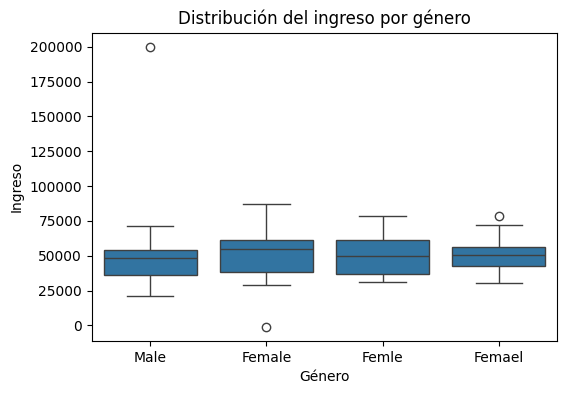

In [41]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Gender', y='Income')
plt.title("Distribución del ingreso por género")
plt.xlabel("Género")
plt.ylabel("Ingreso")
plt.show()

#### Se utiliza para detectar diferencias de los salarios entre hombres y mujeres.

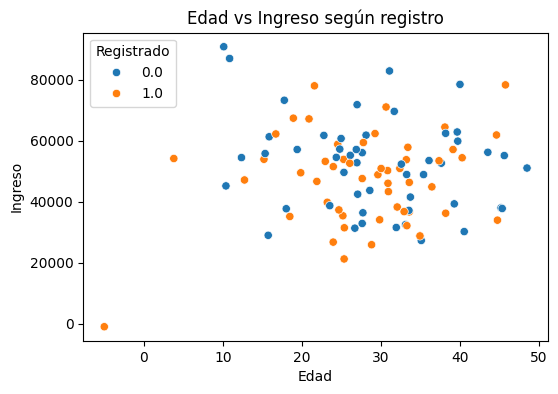

In [42]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='Age', y='Income', hue='Registered')
plt.title("Edad vs Ingreso según registro")
plt.xlabel("Edad")
plt.ylabel("Ingreso")
plt.legend(title='Registrado')
plt.show()

##### Este scatterplot muestra cómo se relacionan la edad y el ingreso, diferenciando por estado de registro.

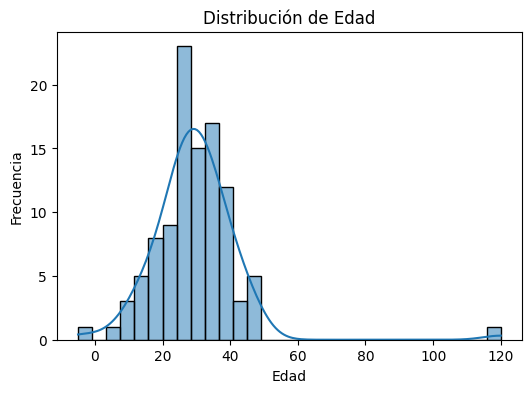

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(data=df, x='Age', kde=True, bins=30)
plt.title("Distribución de Edad")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

#### permite visualizar cómo se distribuyen las edades dentro del dataset. La curva KDE (Kernel Density Estimation) muestra la densidad de probabilidad, permitiendo identificar si hay agrupaciones.

In [45]:
df['Income_log'] = df['Income'].apply(lambda x: np.log(x + 1))

C:\Users\Student\AppData\Local\Temp\ipykernel_19376\987124458.py:1: RuntimeWarning: invalid value encountered in log
  df['Income_log'] = df['Income'].apply(lambda x: np.log(x + 1))


##### Se crea una nueva variable Income_log para normalizar la distribución del ingreso, especialmente útil si la variable original estaba sesgada.

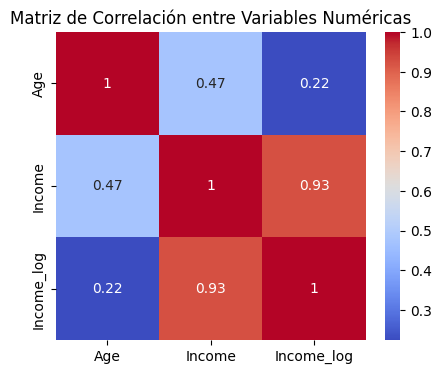

In [46]:
plt.figure(figsize=(5,4))
sns.heatmap(df[['Age', 'Income', 'Income_log']].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

##### La matriz de correlación muestra cómo se relacionan entre sí las variables numéricas del conjunto de datos. 


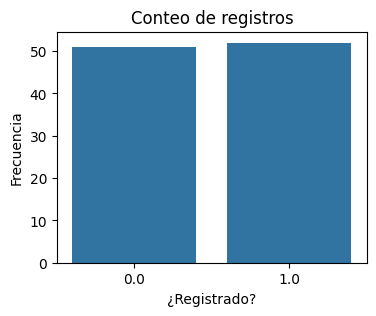

In [48]:
plt.figure(figsize=(4,3))
sns.countplot(x='Registered', data=df)
plt.title("Conteo de registros")
plt.xlabel("¿Registrado?")
plt.ylabel("Frecuencia")
plt.show()

#### Este gráfico de barras muestra cuántas personas están registradas versus y laa no registradas.

#### Data Cleaning

In [47]:
df = pd.read_csv("Synthetic_Data_Cleaning_example.csv")

In [38]:
print(df.isnull().sum())

Age            1
Income         1
Gender        20
Registered     1
City           1
dtype: int64


In [39]:
df.columns

Index(['Age', 'Income', 'Gender', 'Registered', 'City'], dtype='object')

In [40]:
df['Gender'] = df['Gender'].str.strip().str.lower().replace({
    'male': 'Male',
    'female': 'Female'
})
df['Gender'] = df['Gender'].str.capitalize()

In [ ]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [18]:
df['Registered'] = df['Registered'].fillna(df['Registered'].mode()[0])

In [19]:
df = df.drop_duplicates()

In [20]:
df.isnull().sum()

Age            0
Income         0
Gender        20
Registered     0
City           1
dtype: int64

##### Boxplot: Este gráfico muestra cómo varía el ingreso entre hombres y mujeres. Permite identificar diferencias en la mediana, dispersión de valores y detectar posibles outliers por género.



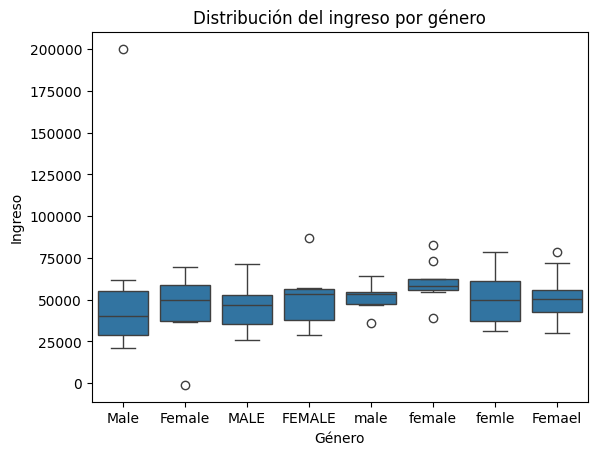

In [50]:
sns.boxplot(data=df, x='Gender', y='Income')
plt.title("Distribución del ingreso por género")
plt.xlabel("Género")
plt.ylabel("Ingreso")
plt.show()

#### Variable Tranformations


In [21]:
df['Income_log'] = np.log1p(df['Income'])

C:\Users\Student\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [22]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [23]:
df = pd.get_dummies(df, columns=['City'], drop_first=True)

In [24]:
df.head()

,Age,Income,Registered,Income_log,Gender_Female,Gender_Femle,Gender_Male,City_New York,City_Paris,City_Tokyo
0,34.967142,28769.438869,1.0,10.267104,False,False,True,True,False,False
1,28.617357,43690.320159,0.0,10.684905,True,False,False,False,True,False
2,36.476885,44859.282252,1.0,10.711308,False,False,True,False,False,True
3,45.230299,37965.840962,0.0,10.544468,True,False,False,False,False,False
4,27.658466,47580.714325,1.0,10.770204,False,False,True,True,False,False
